In [1]:
#import random

Подготовка данных, определение переменных

In [2]:
def y(x1, x2, x3): # исходная функция
    return 3 * (x1 - 4) ** 2 +\
           5 * (x2 + 3) ** 2 +\
           7 * (2*x3+1) ** 2

#NumberOfIndividuals = 10
#PercentOfElite = 0.2
#Trunc = 1.4


#MutationProbability = 0.5
#delta = 0.75 # коеффицент, "сила" мутации delta * 100%

#NumberOfNewIndividuals = 5
#Radius = 50
#MinVal = -50
#MaxVal = 50

In [3]:
y(4, -3, -0.5)

0.0

[[3.0, -4.0, -1.0], [3.0, -4.0, -0.75], [3.0, -4.0, -0.5], [3.0, -4.0, -0.25], [3.0, -3.5, -1.0], [3.0, -3.5, -0.75], [3.0, -3.5, -0.5], [3.0, -3.5, -0.25], [3.0, -3.0, -1.0], [3.0, -3.0, -0.75], [3.0, -3.0, -0.5], [3.0, -3.0, -0.25], [3.0, -2.5, -1.0], [3.0, -2.5, -0.75], [3.0, -2.5, -0.5], [3.0, -2.5, -0.25], [3.5, -4.0, -1.0], [3.5, -4.0, -0.75], [3.5, -4.0, -0.5], [3.5, -4.0, -0.25], [3.5, -3.5, -1.0], [3.5, -3.5, -0.75], [3.5, -3.5, -0.5], [3.5, -3.5, -0.25], [3.5, -3.0, -1.0], [3.5, -3.0, -0.75], [3.5, -3.0, -0.5], [3.5, -3.0, -0.25], [3.5, -2.5, -1.0], [3.5, -2.5, -0.75], [3.5, -2.5, -0.5], [3.5, -2.5, -0.25], [4.0, -4.0, -1.0], [4.0, -4.0, -0.75], [4.0, -4.0, -0.5], [4.0, -4.0, -0.25], [4.0, -3.5, -1.0], [4.0, -3.5, -0.75], [4.0, -3.5, -0.5], [4.0, -3.5, -0.25], [4.0, -3.0, -1.0], [4.0, -3.0, -0.75], [4.0, -3.0, -0.5], [4.0, -3.0, -0.25], [4.0, -2.5, -1.0], [4.0, -2.5, -0.75], [4.0, -2.5, -0.5], [4.0, -2.5, -0.25], [4.5, -4.0, -1.0], [4.5, -4.0, -0.75], [4.5, -4.0, -0.5], [4.5,

C:\Users\Dmitri\AppData\Local\Temp\ipykernel_1624\140144919.py:8: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


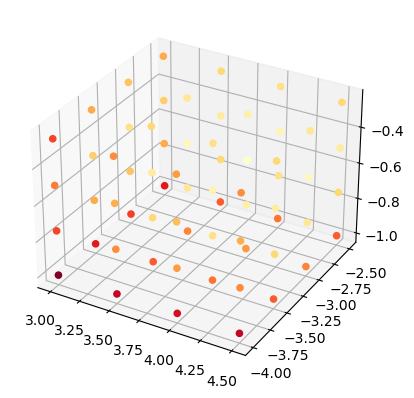

In [121]:
# Python-matplotlib Commands
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
my_X =[]
my_Y = []
for x1 in np.arange(3, 5, 0.5):
    for x2 in np.arange(-4, -2, 0.5):
        for x3 in np.arange(-1, 0, 0.25):
            my_X.append([x1,x2,x3])
            my_Y.append(y(x1,x2,x3))
print(my_X)

#X1 = np.arange(-5, 5, .25)
#X2 = np.arange(-5, 5, .25)
#X3 = np.arange(-5, 5, .25)
#Y = y(X1, X2, X3)
#print(Y)
#X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
#Gx, Gy = np.gradient(Z) # gradients with respect to x and y
#G = (Gx**2+Gy**2)**.5  # gradient magnitude
#N = Y/Y.max()  # normalize 0..1
my_X_T = np.array(my_X).T
#print(my_points_T)
img = ax.scatter(my_X_T[0], my_X_T[1], my_X_T[2], c=my_Y, cmap='YlOrRd', alpha=1)


plt.show()

In [4]:
# Генерация начальной популяции
def population_generate(XArr, num, MinVal_, MaxVal_):
    for i in range(num):
        x1 = random.uniform(MinVal_, MaxVal_)
        x2 = random.uniform(MinVal_, MaxVal_)
        x3 = random.uniform(MinVal_, MaxVal_)
        XArr.append([x1, x2, x3])

In [5]:
#MyArrayOfX = list()
#population_generate(MyArrayOfX, 5, -50, 50)

#MyArrayOfX = np.array(MyArrayOfX)
#MyArrayOfX

In [6]:
#from mpl_toolkits.mplot3d import Axes3D
#import matplotlib.pyplot as plt
#import numpy as np

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

#X1 = np.array(MyArrayOfX).T[0]
#X2 = np.array(MyArrayOfX).T[1]
#X3 = np.array(MyArrayOfX).T[2]
#Y  = [y(x1, x2, x3) for (x1, x2, x3) in MyArrayOfX]

#img = ax.scatter(X1, X2, X3, c=Y, cmap=plt.hot())
#fig.colorbar(img)
#plt.show()

In [7]:
def Individual_sort(XArr):
    Y  = [y(x1, x2, x3) for (x1, x2, x3) in XArr]
#    XProb = [[XArr[i], Y[i]] for i in range(len(XArr))]
    XProb = zip(XArr, Y)
    #print(XProb)
    
    #отсортируем, взяв первый элемент каждого списка как ключ
    XProb = sorted(XProb, key=lambda tup: tup[1])
    
    #и последний шаг - извлечем
    SortedX    = [i[0] for i in XProb]
    
    XArr = SortedX
    return SortedX
#    Probability = SortedProb

In [8]:
#MyArrayOfX = Individual_sort(MyArrayOfX)


In [9]:
#print(MyArrayOfX)

In [10]:
#for x1,x2,x3 in MyArrayOfX:
#    print(y(x1, x2, x3))

In [11]:
# Выбор родителей случайным образом
def parent_selection(XArr):
    index1 = random.randint(0, len(XArr)-1)
    index2 = random.randint(0, len(XArr)-1)
    
    return [XArr[index1], XArr[index2]]

In [12]:
# Вычисление пригодности
def calculate_fitness(XArr):
    Y = [y(x1, x2, x3) for (x1, x2, x3) in XArr]
    Y = np.array(Y)
    return [np.argmin(Y), np.min(Y)]

In [13]:
def сrossover(parent1, parent2):
    #RandVal1 = random.uniform(-delta_, 1+delta_)
    #RandVal2 = random.uniform(-delta_, 1+delta_)
    #RandVal3 = random.uniform(-delta_, 1+delta_)
    
    #return [parent1[0] + RandVal1 * parent2[0], \
    #        parent1[1] + RandVal2 * parent2[1], \
    #        parent1[2] + RandVal3 * parent2[2]]
    return [(parent1[0] + parent2[0]) / 2.0, \
            (parent1[1] + parent2[1]) / 2.0, \
            (parent1[2] + parent2[2]) / 2.0]

In [14]:
#m=20
#
#def alpha_mutation(i):
#    if (random.randint(1, i) == 1):
#        return 1;
#    else:
#        return 0;

# Мутация для вещественных особей
# новая переменная = старая переменная ± α · δ,
def mutation(Individual, MutationRate_, delta_, MutationProbability_):
    my_delta = delta_ * MutationRate_
    
    #Случайная мутация от -my_delta% до my_delta% процентов
    #num = random.randint(0, 2)
    Individual[0] *= 1 + random.uniform(-my_delta, my_delta) * (1 if random.uniform(0, 1) <= MutationProbability_ else 0)
    Individual[1] *= 1 + random.uniform(-my_delta, my_delta) * (1 if random.uniform(0, 1) <= MutationProbability_ else 0)
    Individual[2] *= 1 + random.uniform(-my_delta, my_delta) * (1 if random.uniform(0, 1) <= MutationProbability_ else 0)
    
    return Individual

In [15]:
#A = [0.01, 5, 15]
#
#print(mutation(A, 5))
#
#A = [0.01, 5, 15]
#
#print(mutation(A, 0.01))

In [16]:
def calculate_mutation_step(XArr):
    XArrNumPy = np.array(XArr).T
    diff1 = abs(np.max(XArrNumPy[0]) - np.min(XArrNumPy[0]))
    diff2 = abs(np.max(XArrNumPy[1]) - np.min(XArrNumPy[1]))
    diff3 = abs(np.max(XArrNumPy[2]) - np.min(XArrNumPy[2]))
    return max(diff1, diff2, diff3)

In [59]:
import time
import math
import random
import pandas as pd
import numpy as np
  

def start_GA(MaxStep, NumberOfIndividuals, MinVal, MaxVal, delta, MutationProbability):
    dict = {'Итерация':[],
            'x1':[],
            'x2':[],
            'x3':[],
            'Минимальное значение':[]}

    Gigaframe = pd.DataFrame(dict)

    ExMyArrayOfX = []
    
    population_generate(ExMyArrayOfX, NumberOfIndividuals, MinVal, MaxVal)
    index, value = calculate_fitness(ExMyArrayOfX)
    #print(ExMyArrayOfX)
    step=0
    
    while(value != 0 and step<MaxStep):
        step+=1;
    
        ChildArray = []
        NumOfCrosses = NumberOfIndividuals
    
        while NumOfCrosses > 0:
            P1, P2 = parent_selection(ExMyArrayOfX);
        
            if (P1 == P2):
                continue;
        
            MutationRate = calculate_mutation_step(ExMyArrayOfX)
            Child = mutation(сrossover(P1, P2), MutationRate, delta, MutationProbability)
        
            if (Child in ExMyArrayOfX) or (Child in ChildArray):
                continue
        
            ChildArray.append(Child);
            NumOfCrosses -= 1;
        
        ExMyArrayOfX += ChildArray
    
        ExMyArrayOfX = Individual_sort(ExMyArrayOfX)

        ExMyArrayOfX = ExMyArrayOfX[:NumberOfIndividuals]
        #print(step, value)
        #print(ExMyArrayOfX, '\n', '\n',  '\n', '\n')
    
        index, value = calculate_fitness(ExMyArrayOfX)
        
        dict = {'Итерация':[str(step)],
                'x1':[str(ExMyArrayOfX[0][0])],
                'x2':[str(ExMyArrayOfX[0][1])],
                'x3':[str(ExMyArrayOfX[0][2])],
                'Минимальное значение':[str(value)],
        }
  
        Miniframe = pd.DataFrame(dict)
  
        Gigaframe = pd.concat([Gigaframe, Miniframe], ignore_index = True)
        Gigaframe.reset_index()
        #time.sleep(0.001)
    return Gigaframe

In [48]:
#start_GA(MaxStep=10000, NumberOfIndividuals=10, MinVal=-50, MaxVal=+50, delta = 0.25, MutationProbability = 0.5)

In [62]:
Gulala = []
for Num in range(5, 260, 25):
    ulala=[]
    for Num2 in range(50):
        ulala.append(start_GA(MaxStep=400, NumberOfIndividuals=Num, MinVal=-50, MaxVal=+50, delta = 0.75, MutationProbability = 0.5))
    Gulala.append(ulala)
    print(Num)

5
30
55
80
105
130
155
180
205
230
255


In [63]:
import numpy as np
import matplotlib.pyplot as plt
Gulala_copy = Gulala.copy()

#Lens = list(map(map(len), Gulala_copy))

Lens = list(map(lambda x: list(map(len, x)), Gulala_copy))                #TODO борьба с выбросами
#print(f1_b)
#Lens[2][9] = np.mean(Lens[2][:9])                                         #TODO борьба с выбросами
#print(Lens)

average = list(map(np.mean, Lens))

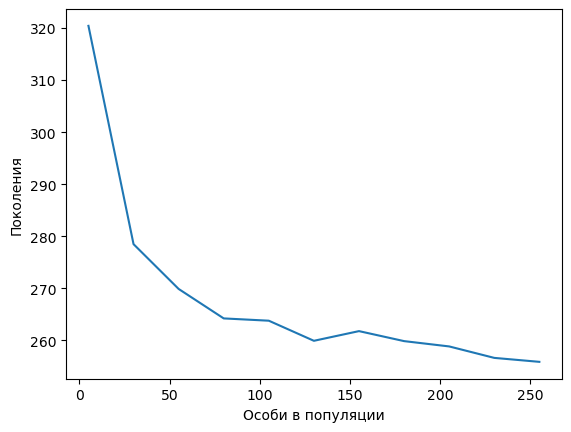

In [64]:
x = np.arange(5, 260, 25)

plt.plot(x, average)
plt.xlabel ('Особи в популяции')
plt.ylabel ('Поколения')
#plt.title ('Зависимость скорости сходимости от количества особей в популяции')
#plt.plot.yscale("log")
plt.show()

[1602.0, 8354.400000000001, 14843.4, 21137.600000000002, 27696.899999999998, 33789.6, 40575.899999999994, 46774.8, 53062.2, 59027.2, 65249.4]


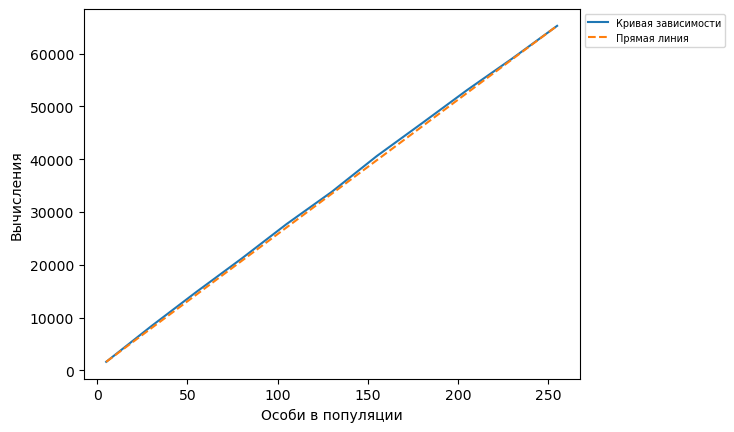

In [67]:
x = np.arange(5, 260, 25)

NumberOfComputations = list(map(lambda x, y: x*y, x, average))
print(NumberOfComputations)
plt.plot(x, NumberOfComputations, label="Кривая зависимости")

k = (NumberOfComputations[-1]-NumberOfComputations[0])/(x[-1] - x[0])
b = NumberOfComputations[0]-k*x[0]

plt.plot(x, k*x + b, label="Прямая линия", linestyle='dashed')
plt.legend(loc='upper left',prop = {'size':7},bbox_to_anchor=(1,1))
plt.xlabel('Особи в популяции')
plt.ylabel('Вычисления')

#plt.title ('Зависимость скорости сходимости от количества особей в популяции')
#plt.plot.yscale("log")
plt.show()

In [74]:
print(np.round(np.linspace(0.4, 5, 21), 2))

[0.4  0.63 0.86 1.09 1.32 1.55 1.78 2.01 2.24 2.47 2.7  2.93 3.16 3.39
 3.62 3.85 4.08 4.31 4.54 4.77 5.  ]


In [75]:
Gulala_delta = []

for my_delta in np.round(np.linspace(0.4, 5, 21), 2):
    ulala=[]
    for Num2 in range(50):
        print(".", end=" ")
        ulala.append(start_GA(MaxStep=10000, NumberOfIndividuals=20, MinVal=-50, MaxVal=+50, delta = my_delta, MutationProbability = 0.5))
    Gulala_delta.append(ulala)
    print(my_delta)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.4
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.63
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.86
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1.09
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1.32
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1.55
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 1.78
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2.01
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 2.24
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [79]:
Gulala_delta_copy = Gulala_delta.copy()

#Lens = list(map(map(len), Gulala_copy))

DeltaS = list(map(lambda x: list(map(len, x)), Gulala_delta_copy))                #TODO борьба с выбросами
#print(f1_b)
#Lens[2][9] = np.mean(Lens[2][:9])                                         #TODO борьба с выбросами
#print(Lens)

average_delta = list(map(np.mean, DeltaS))
print(average_delta)

[195.86, 257.2, 309.8, 356.16, 402.88, 447.26, 497.5, 518.62, 564.5, 610.86, 632.06, 665.52, 696.38, 721.72, 766.98, 783.74, 820.76, 829.86, 864.56, 888.76, 936.7]


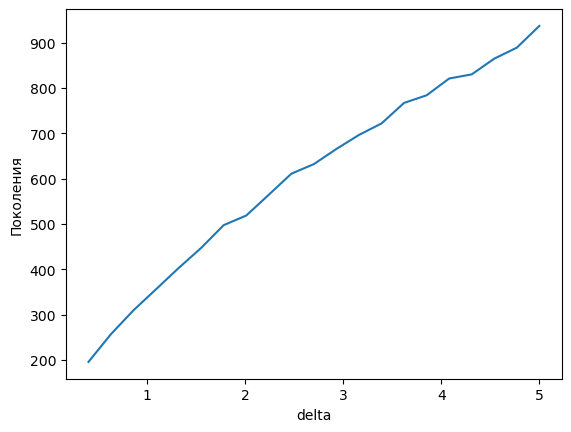

In [78]:
x = np.round(np.linspace(0.4, 5, 21), 2)

plt.plot(x, average_delta)
plt.xlabel ('delta')
plt.ylabel ('Поколения')
#plt.title ('Зависимость скорости сходимости от количества особей в популяции')
#plt.plot.yscale("log")
plt.show()

In [95]:
#list(np.linspace(0.1, 1, 21))

In [98]:
Gulala_MutationProb = []

for my_MutationProb in np.round(np.linspace(0.1, 1, 21), 2):
    ulala=[]
    for Num2 in range(50):
        print(".", end=" ")
        ulala.append(start_GA(MaxStep=10000, NumberOfIndividuals=20, MinVal=-50, MaxVal=+50, delta = 0.4, MutationProbability = my_MutationProb))
    Gulala_MutationProb.append(ulala)
    print(my_MutationProb)

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.1
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.15
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.19
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.24
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.28
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.32
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.37
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.42
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 0.46
. . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [99]:
Gulala_MutationProb_copy = Gulala_MutationProb.copy()

#Lens = list(map(map(len), Gulala_copy))

MutationProbS = list(map(lambda x: list(map(len, x)), Gulala_MutationProb_copy))                #TODO борьба с выбросами
#print(f1_b)
#Lens[2][9] = np.mean(Lens[2][:9])                                         #TODO борьба с выбросами
#print(Lens)

average_mutationprob = list(map(np.mean, MutationProbS))
print(average_mutationprob)

[2186.68, 546.0, 188.68, 359.88, 152.66, 152.5, 161.26, 168.82, 180.32, 195.3, 219.46, 250.26, 278.32, 317.8, 373.98, 439.96, 547.5, 668.5, 895.14, 1271.84, 1844.58]


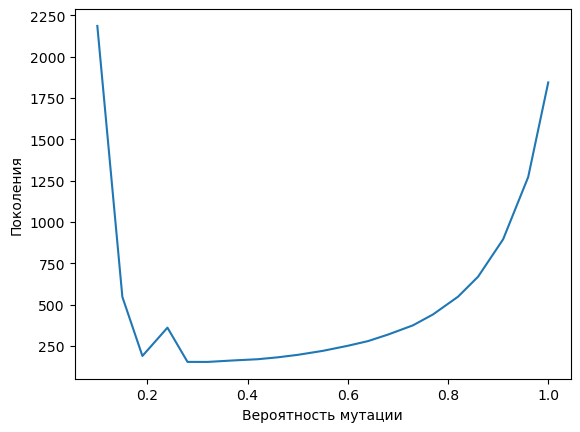

In [100]:
x = np.round(np.linspace(0.1, 1, 21), 2)

plt.plot(x, average_mutationprob)
plt.xlabel ('Вероятность мутации')
plt.ylabel ('Поколения')
#plt.title ('Зависимость скорости сходимости от количества особей в популяции')
#plt.plot.yscale("log")
plt.show()

In [18]:
StatusName = ["Введите значения", "Значения введены корректно", "Исправьте значения и попробуйте снова"]

def draw_status(status):
    lblStatus.configure(text=status)

In [19]:
def action():

    if True:
        MyNumStr = IndividNum.get()
        MyProbStr = ProbabValue.get()
        MyСoeffVal = СoeffValue.get()
        MyMinRange = MinRangeValue.get()
        MyMaxRange = MaxRangeValue.get()

        TypeGood = False
        try:
            MyNumStr = int(MyNumStr)
            MyProbStr = float(MyProbStr)
            MyСoeffVal = float(MyСoeffVal)
            MyMinRange = float(MyMinRange)
            MyMaxRange = float(MyMaxRange)
            
            TypeGood = True
        except:
            TypeGood = False
        
        if TypeGood and 5 <= MyNumStr <= 500 and 0.01 < MyProbStr <= 1\
            and 0.01 < MyСoeffVal <= 10 and -1000 < MyMinRange < MyMaxRange and MyMinRange < 1000:
        
            draw_status(StatusName[1])
            
            df = start_GA(MaxStep=1000, NumberOfIndividuals=MyNumStr, MinVal=MyMinRange, MaxVal=MyMaxRange, delta = MyСoeffVal, MutationProbability = MyProbStr)
            pt = Table(myframe_dataframe, dataframe=df, showtoolbar=True, showstatusbar=True)
            pt.show()

        else:
            draw_status(StatusName[2])

def cancel():
    IndividNum.delete(0,END)
    ProbabValue.delete(0,END)
    MinRangeValue.delete(0,END)
    MaxRangeValue.delete(0,END)
    draw_status(StatusName[0])

In [20]:
from tkinter import *  
from pandastable import Table, TableModel



window = Tk()
window.title("Генетический алгоритм")  
window.geometry('1000x470')

myframe_dataframe = Frame(window)
myframe_GUI = Frame(window)
#f.place(x=500, y=10)

lblStatus = Label(myframe_GUI, text=StatusName[0], font=("Arial Bold", 15))  
#lblStatus.grid(column=0, row=0)

##########################################################################################################
IndividNum = StringVar()

IndividNumLabel = Label(myframe_GUI , text = "Количество особей :" , font = 'sans-serif 14 bold',bg="#CD5C5C")
#IndividNumLabel.place(x=220 , y=100,anchor='e')

IndividNum = Entry(myframe_GUI, bd=5,width=31,font = 'sans-serif 14 bold',textvariable = IndividNum)
IndividNum.focus()
#IndividNum.place(x=250 , y= 85)


##########################################################################################################
ProbabValue = StringVar()

ProbabValueLabel = Label(myframe_GUI , text = "Вероятность мутации :" , font = 'sans-serif 14 bold',bg="#CD5C5C")
#ProbabValueLabel.place(x=240 , y=150,anchor='e')

ProbabValue = Entry(myframe_GUI, bd=5, width=31,font = 'sans-serif 14 bold',textvariable = ProbabValue)
ProbabValue.focus()
#ProbabValue.place(x=250 , y= 135)

##########################################################################################################
СoeffValue = StringVar()

СoeffValueLabel = Label(myframe_GUI , text = "Коеффицент мутации :" , font = 'sans-serif 14 bold',bg="#CD5C5C")
#СoeffValueLabel.place(x=240 , y=200,anchor='e')

СoeffValue = Entry(myframe_GUI, bd=5, width=31,font = 'sans-serif 14 bold',textvariable = СoeffValue)
СoeffValue.focus()
#СoeffValue.place(x=250 , y= 185)


##########################################################################################################
RangeLabel = Label(myframe_GUI , text = "Диапазон начальных значений :" , font = 'sans-serif 14 bold',bg="#CD5C5C")
#RangeLabel.place(x=325 , y=250,anchor='e')

##########################################################################################################
MinRangeValue = StringVar()

MinRangeValueLabel = Label(myframe_GUI , text = "Начало :" , font = 'sans-serif 14 bold',bg="#CD5C5C")
#MinRangeValueLabel.place(x=240 , y=300,anchor='e')

MinRangeValue = Entry(myframe_GUI, bd=5, width=10,font = 'sans-serif 14 bold', textvariable = MinRangeValue)
MinRangeValue.focus()
#MinRangeValue.place(x=250 , y= 285)


##########################################################################################################
MaxRangeValue = StringVar()

MaxRangeValueLabel = Label(myframe_GUI , text = "Конец :" , font = 'sans-serif 14 bold',bg="#CD5C5C")
#MaxRangeValueLabel.place(x=470 , y=300,anchor='e')

MaxRangeValue = Entry(myframe_GUI, bd=5, width=10,font = 'sans-serif 14 bold',textvariable = MaxRangeValue)
MaxRangeValue.focus()
#MaxRangeValue.place(x=480 , y= 285)



##########################################################################################################
enter = Button(myframe_GUI, text = "Ввести" ,font='Verdana 13 bold', width=12, height=2, command = action)
#enter.place(x=400, y=350)

cancel = Button(myframe_GUI, text = "Сброс" ,font='Verdana 13 bold', width=12, height=2,  command = cancel)
#cancel.place(x=220, y=350)


##########################################################################################################
##########################################################################################################
##########################################################################################################


myframe_dataframe.pack(side=RIGHT, fill=BOTH,expand=1)
myframe_GUI.pack(side=LEFT)

lblStatus.pack()
IndividNumLabel.pack()
IndividNum.pack()
ProbabValueLabel.pack()
ProbabValue.pack()
СoeffValueLabel.pack()
СoeffValue.pack()

RangeLabel.pack()
MinRangeValue.pack()
MinRangeValueLabel.pack()
MaxRangeValue.pack()
MaxRangeValueLabel.pack()
enter.pack()
cancel.pack()



df = pd.DataFrame({'Итерация':[], 'x1':[], 'x2':[], 'x3':[], 'Минимальное значение':[]})
pt = Table(myframe_dataframe, dataframe=df, showtoolbar=True, showstatusbar=True)
pt.show()

window.mainloop()

5
0.5
0.75
-50 50